# Multiple Linear Regression

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [44]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [45]:
import numpy as np
import pandas as pd
from datetime import datetime as dt

In [46]:
PropPrice = pd.read_csv("train.csv")
PropPrice = PropPrice.drop('Id',axis=1) #instant is just indexing, it won't help in Model

In [47]:
# Check the head of the dataset
PropPrice.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
PropPrice.shape

(1460, 80)

In [49]:
PropPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

We can see above that we don't have any null values, also the variables are of integer and float type except 'dteday'.

In [50]:
PropPrice.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

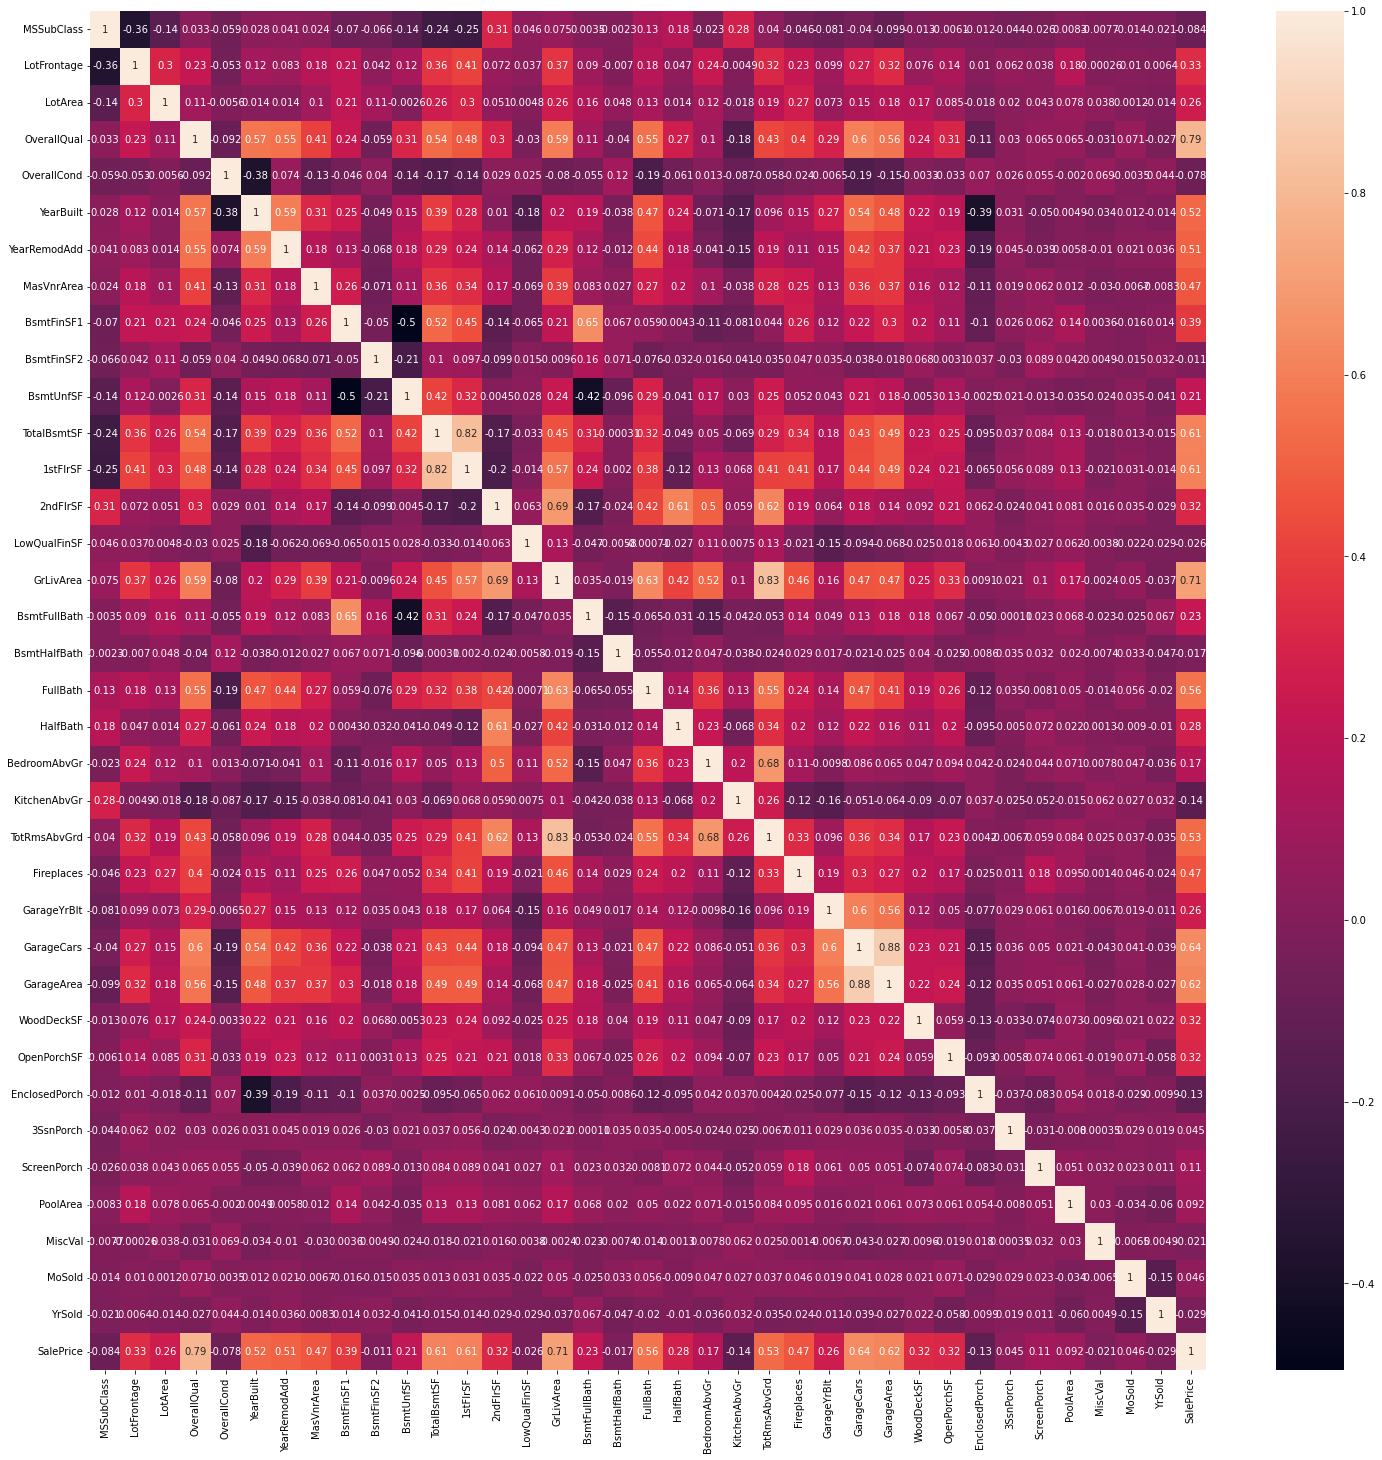

In [77]:
plt.figure(figsize=(25, 25))
sns.heatmap(PropPrice.corr(), annot=True)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [78]:
sns.pairplot(PropPrice)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026D5BA15C10> (for post_execute):


KeyboardInterrupt: 

The pair plot are too small in size, so drop some variables and retain which need to visualise more.

In [53]:
PropPrice['PoolQC'].fillna('NoPool',inplace=True)

In [56]:
PropPrice['LotFrontage'].fillna(69,inplace=True)

In [59]:
PropPrice['Alley'].fillna('NoAlyAcs',inplace=True)

In [61]:
PropPrice['MasVnrType'].fillna('None',inplace=True)

In [62]:
PropPrice['MasVnrArea'].fillna(0,inplace=True)

In [64]:
PropPrice['BsmtQual'].fillna('NoBsmnt',inplace=True)
PropPrice['BsmtCond'].fillna('NoBsmnt',inplace=True)
PropPrice['BsmtExposure'].fillna('NoBsmnt',inplace=True)
PropPrice['BsmtFinType1'].fillna('NoBsmnt',inplace=True)
PropPrice['BsmtFinType2'].fillna('NoBsmnt',inplace=True)

In [66]:
PropPrice['Electrical'].fillna('Mix',inplace=True)

In [68]:
PropPrice['FireplaceQu'].fillna('NoFirePlc',inplace=True)

In [70]:
PropPrice['GarageType'].fillna('NoGrg',inplace=True)
PropPrice['GarageYrBlt'].fillna(0,inplace=True)
PropPrice['GarageFinish'].fillna('NoGrg',inplace=True)
PropPrice['GarageQual'].fillna('NoGrg',inplace=True)
PropPrice['GarageCond'].fillna('NoGrg',inplace=True)

In [73]:
PropPrice['Fence'].fillna('NoFnc',inplace=True)

In [75]:
PropPrice['MiscFeature'].fillna('NoMscFtr',inplace=True)

In [76]:
PropPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

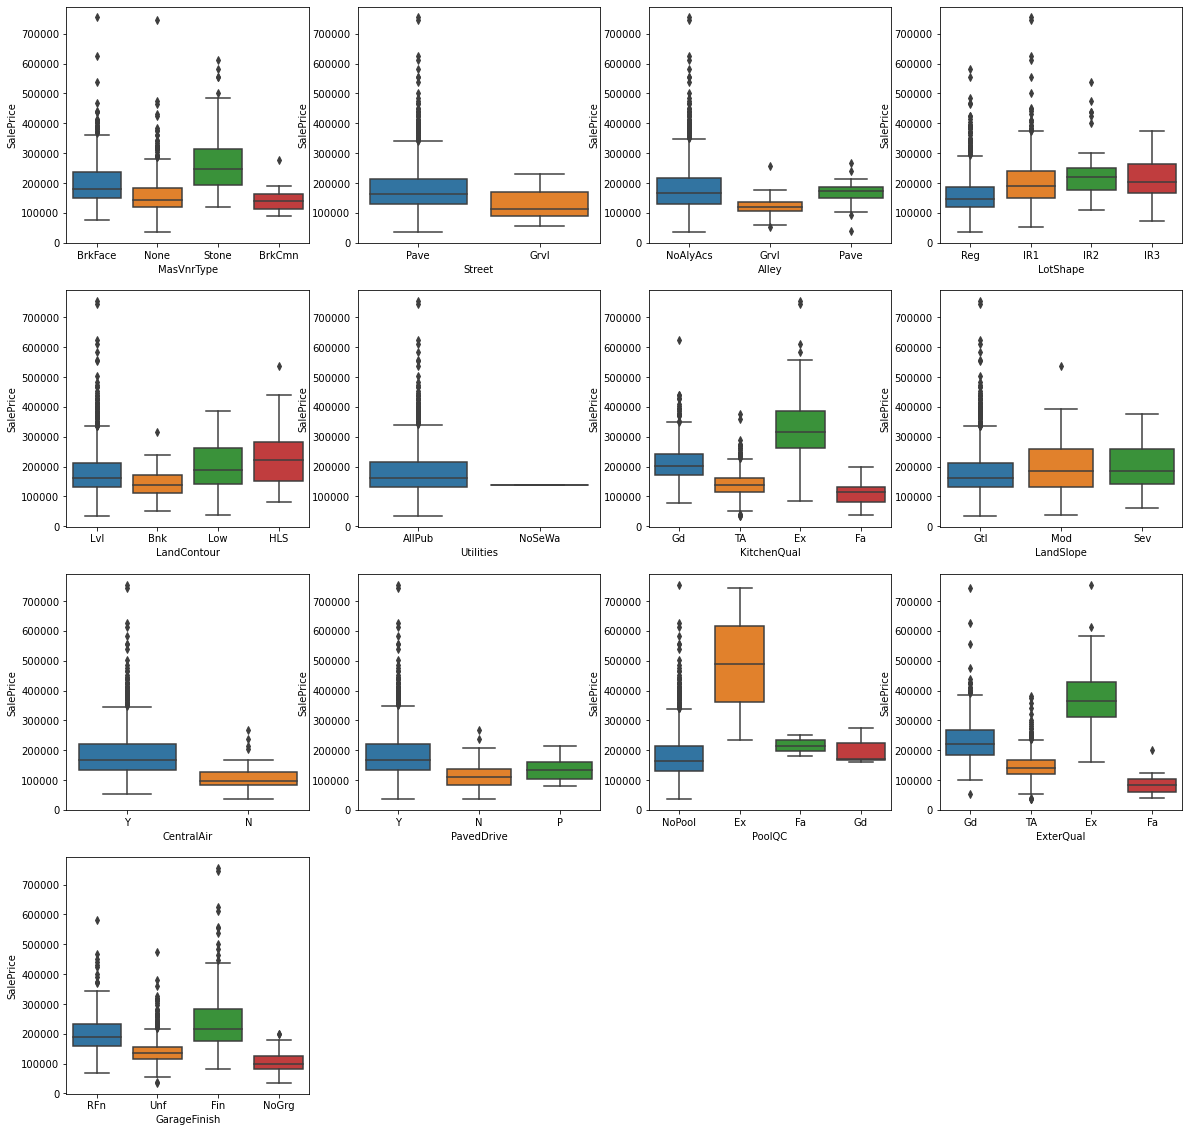

In [146]:
plt.figure(figsize=(20, 20))
plt.subplot(4,4,1)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = PropPrice)
plt.subplot(4,4,2)
sns.boxplot(x = 'Street', y = 'SalePrice', data = PropPrice)
plt.subplot(4,4,3)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = PropPrice)
plt.subplot(4,4,4)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = PropPrice)
plt.subplot(4,4,5)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = PropPrice)
plt.subplot(4,4,6)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = PropPrice)
plt.subplot(4,4,7)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = PropPrice)
plt.subplot(4,4,8)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = PropPrice)
plt.subplot(4,4,9)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = PropPrice)
plt.subplot(4,4,10)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = PropPrice)
plt.subplot(4,4,11)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = PropPrice)
plt.subplot(4,4,12)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = PropPrice)
plt.subplot(4,4,13)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = PropPrice)

plt.show()

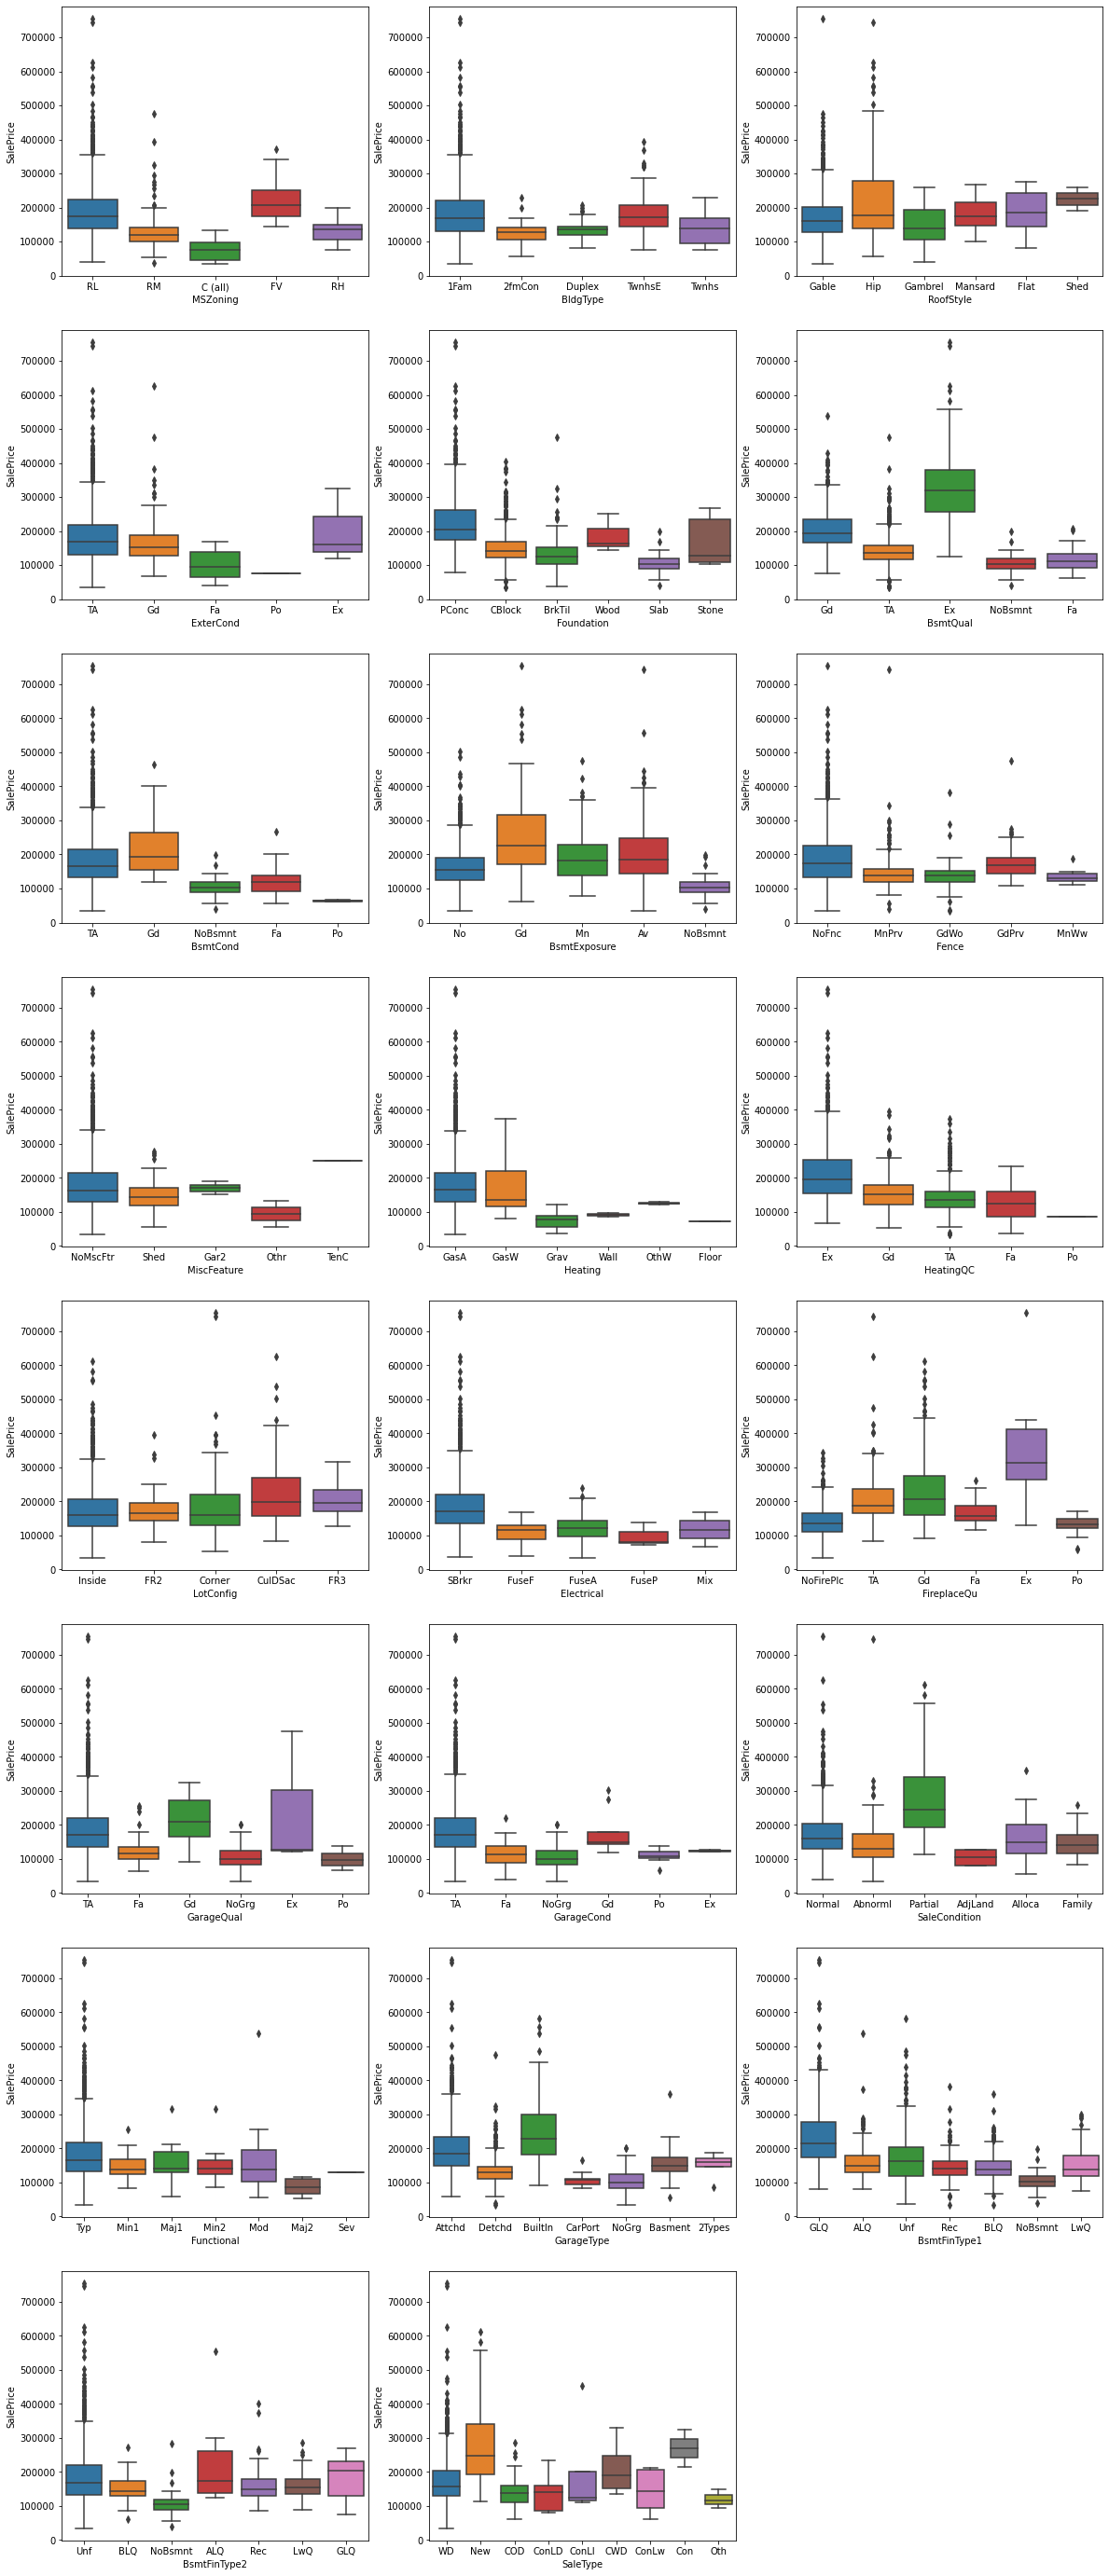

In [144]:
plt.figure(figsize=(20, 50))
plt.subplot(8,3,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,3)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,4)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,5)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,6)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,7)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,8)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,9)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,10)
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,11)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,12)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,13)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,14)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,15)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,16)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,17)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,18)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,19)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,20)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,21)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,22)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = PropPrice)
plt.subplot(8,3,23)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = PropPrice)
plt.show()

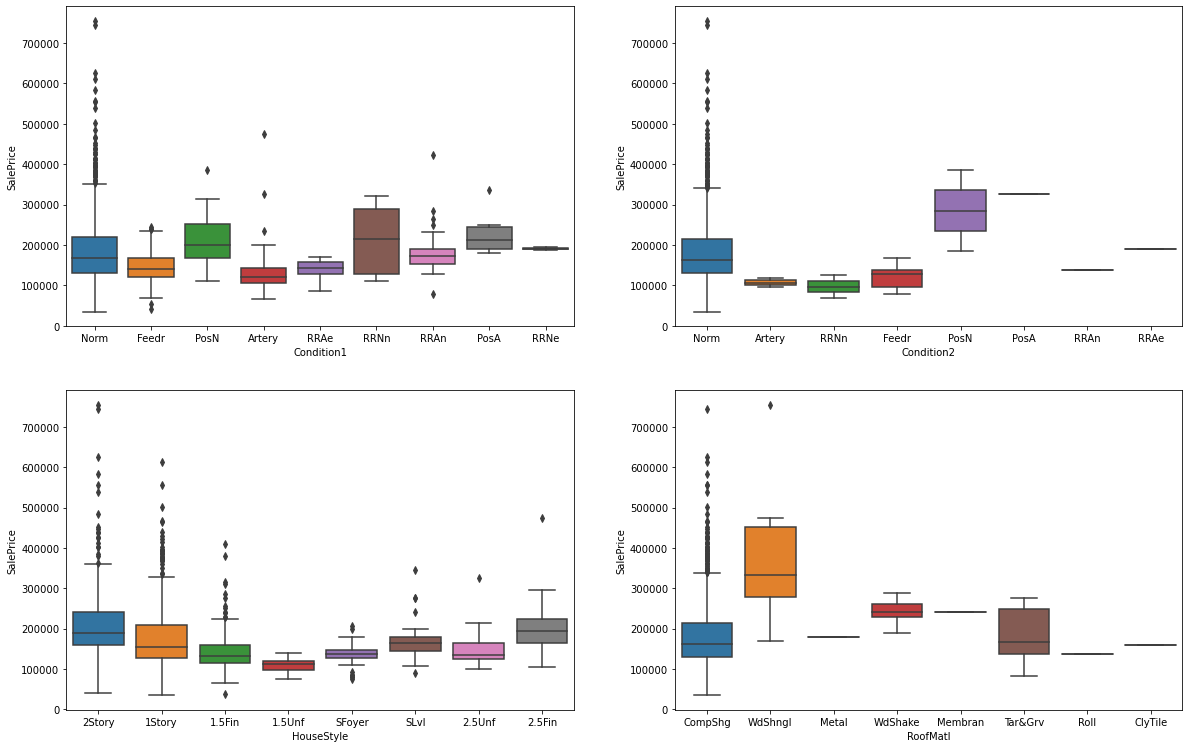

In [142]:
plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = PropPrice)
plt.subplot(3,2,2)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = PropPrice)
plt.subplot(3,2,3)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = PropPrice)
plt.subplot(3,2,4)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = PropPrice)
plt.show()

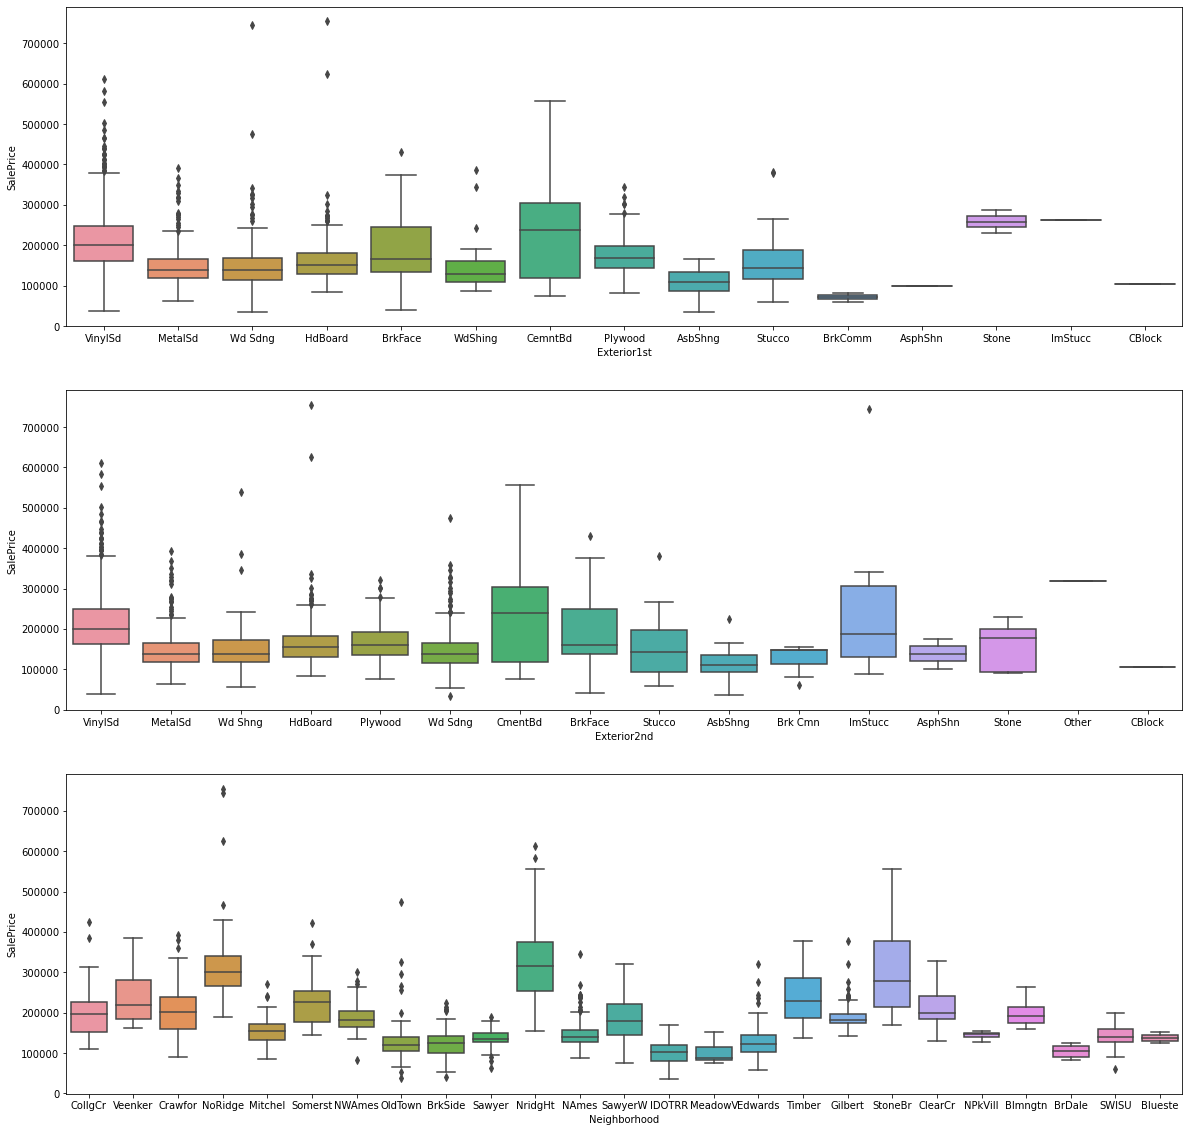

In [143]:
plt.figure(figsize=(20, 20))
plt.subplot(3,1,1)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = PropPrice)
plt.subplot(3,1,2)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = PropPrice)
plt.subplot(3,1,3)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = PropPrice)
plt.show()

In [ ]:
sns.regplot(x='MSSubClass',y='SalePrice',data=PropPrice)

We can also visualise some of these categorical features parallely by using the `hue` argument.

## Step 3: Data Preparation

### Dummy Variables

All the categorial variables have integer values already.

Create dummy variable 'day' from 'dteday'.

In [19]:
bikeSharing["day"] = pd.to_datetime(bikeSharing["dteday"],dayfirst=True).dt.day
bikeSharing = bikeSharing.drop(['dteday'],axis=1)

registered and casual are the part of target variable cnt. If we consider the both for model, both the varible will describe the whole model as cnt=registered+casual. So remove these two variable. But to consider the effect of this two we created a new dummy varible regi_casual (regi_casual=registered/casual).

In [20]:
bikeSharing["regi_casual"] = bikeSharing["registered"]/bikeSharing["casual"]

In [21]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,regi_casual
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1.975831
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,5.114504
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,10.241667
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,13.462963
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,18.512195


In [22]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    int64  
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    int64  
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    int64  
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    int64  
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   hum          730 non-null    float64
 10  windspeed    730 non-null    float64
 11  casual       730 non-null    int64  
 12  registered   730 non-null    int64  
 13  cnt          730 non-null    int64  
 14  day          730 non-null    int64  
 15  regi_casual  730 non-null    float64
dtypes: float64(5), int64(11)
memory usage: 91.4 KB


In [23]:
bikeSharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,regi_casual
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,15.720548,7.703952
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,8.802278,7.058377
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,1.000000,0.959540
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,8.000000,3.649647
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,16.000000,5.717987
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,23.000000,9.048707
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,31.000000,74.888889


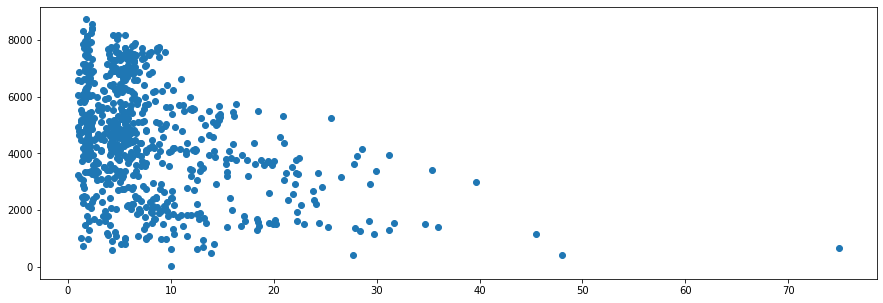

In [24]:
plt.figure(figsize = (15,5))
plt.scatter(x = bikeSharing['regi_casual'], y = bikeSharing['cnt'])

Drop the 'registered' & 'casual' variables as both are higly(directly) related to target variable 'cnt'. If we will not drop then these variables will neglect the effect of other variables. Instead of these two, we will use the newly created variable regi_casual.

In [25]:
bikeSharing = bikeSharing.drop(['registered','casual'],axis=1)

In [26]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,regi_casual
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1.975831
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2,5.114504
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,10.241667
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4,13.462963
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5,18.512195


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
df_train.shape

(510, 14)

In [29]:
df_test.shape

(219, 14)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
# Apply scaler()
num_vars = ['season', 'mnth', 'weekday', 'weathersit', 'temp','atemp','hum','windspeed','regi_casual','cnt','day']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,regi_casual
653,1.000000,1,0.818182,0,0.333333,1,0.0,0.509887,0.501133,0.575354,0.300794,0.864243,0.500000,0.084024
576,0.666667,1,0.545455,0,0.333333,1,0.0,0.815169,0.766351,0.725633,0.264686,0.827658,1.000000,0.074328
426,0.000000,1,0.181818,0,1.000000,0,0.5,0.442393,0.438975,0.640189,0.255342,0.465255,0.066667,0.031024
728,0.000000,1,1.000000,0,0.000000,0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,0.966667,0.040235
482,0.333333,1,0.272727,0,1.000000,0,0.5,0.395666,0.391735,0.504508,0.188475,0.482973,0.900000,0.024460


In [34]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,regi_casual
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.505882,0.507843,0.504456,0.025490,0.498366,0.676471,0.20098,0.537262,0.512989,0.650369,0.320768,0.513620,0.487124,0.091817
std,0.370649,0.500429,0.315338,0.157763,0.336182,0.468282,0.27377,0.225844,0.212385,0.145882,0.169797,0.224593,0.296648,0.095004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.00000,0.339853,0.332086,0.538643,0.199179,0.356420,0.233333,0.035568
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.00000,0.540519,0.526811,0.653714,0.296763,0.518638,0.500000,0.064573
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.50000,0.735215,0.688457,0.754830,0.414447,0.684710,0.733333,0.109936
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


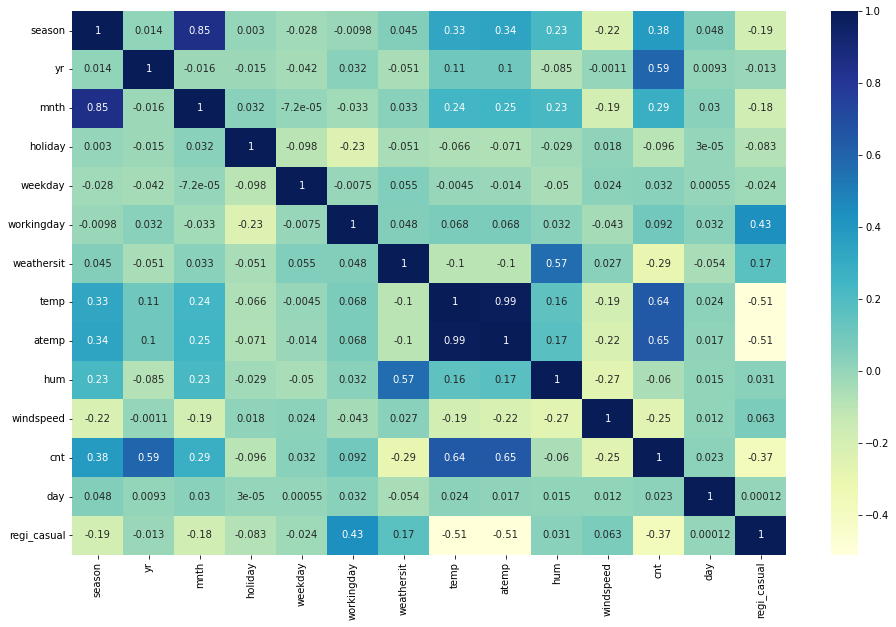

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `regi_casual` seems to the negetively correlated to `cnt`. Some other variables are also have high positive correlation values.

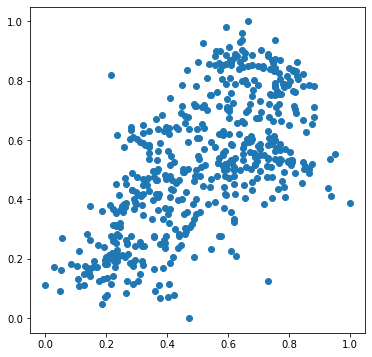

In [36]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

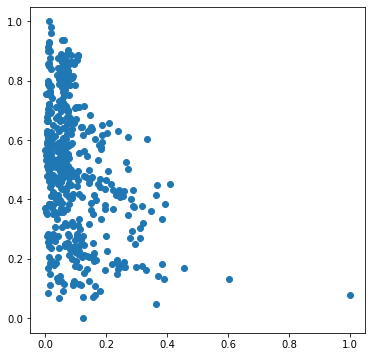

In [37]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.regi_casual, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [39]:
# Check all the columns of the dataframe

bikeSharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day',
       'regi_casual'],
      dtype='object')

In [40]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train) #Add a constant (intercept variable)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const          0.216253
season         0.149734
yr             0.236528
mnth          -0.026858
holiday       -0.069823
weekday        0.046403
workingday     0.044063
weathersit    -0.159784
temp           0.198804
atemp          0.229975
hum           -0.075861
windspeed     -0.158544
day           -0.009274
regi_casual   -0.262097
dtype: float64

In [41]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          2.86e-170
Time:                        08:52:58   Log-Likelihood:                 464.18
No. Observations:                 510   AIC:                            -900.4
Df Residuals:                     496   BIC:                            -841.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2163      0.033      6.565      

In [42]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,348.29
7,temp,334.86
9,hum,20.48
2,mnth,13.37
0,season,11.34
5,workingday,4.61
10,windspeed,3.90
11,day,3.66
12,regi_casual,3.65
4,weekday,3.05


From above analysis, we can see that we have higher p value & VIF for some variables. The day variable have lower VIF but it has much higher p value.

In [44]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('day', 1)

In [45]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [46]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     178.3
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          2.54e-171
Time:                        08:53:09   Log-Likelihood:                 463.98
No. Observations:                 510   AIC:                            -902.0
Df Residuals:                     497   BIC:                            -846.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2129      0.032      6.555      

In [47]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,347.75
7,temp,334.17
9,hum,19.22
2,mnth,13.37
0,season,11.32
5,workingday,4.61
10,windspeed,3.82
11,regi_casual,3.64
4,weekday,3.04
6,weathersit,2.20


The adjusted R squared value is same after droping the 'day'. Now we will drop another variable 'mnth' & build a new model.

In [48]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth', 1)

In [49]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     194.4
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          2.87e-172
Time:                        08:53:19   Log-Likelihood:                 463.48
No. Observations:                 510   AIC:                            -903.0
Df Residuals:                     498   BIC:                            -852.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2104      0.032      6.498      

In [51]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,atemp,347.75
6,temp,334.08
8,hum,18.06
4,workingday,4.60
9,windspeed,3.81
10,regi_casual,3.63
0,season,3.40
3,weekday,3.01
5,weathersit,2.17
1,yr,2.03


The adjusted R squared value is same after droping the 'mnth'. Now we will drop another variable 'temp' & build a new model.

In [52]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('temp', 1)

In [53]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     213.2
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          5.27e-173
Time:                        08:53:25   Log-Likelihood:                 462.44
No. Observations:                 510   AIC:                            -902.9
Df Residuals:                     499   BIC:                            -856.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2083      0.032      6.433      

In [55]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,hum,17.82
6,atemp,11.65
4,workingday,4.60
8,windspeed,3.71
9,regi_casual,3.62
0,season,3.40
3,weekday,3.01
5,weathersit,2.16
1,yr,2.03
2,holiday,1.09


The adjusted R squared value is same after droping the 'temp'. Now we will drop another variable 'hum' & build a new model.

In [56]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1)

In [57]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [58]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     234.8
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          2.85e-173
Time:                        08:53:30   Log-Likelihood:                 460.24
No. Observations:                 510   AIC:                            -900.5
Df Residuals:                     500   BIC:                            -858.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1589      0.022      7.198      

In [59]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,atemp,6.97
4,workingday,4.59
7,windspeed,3.52
0,season,3.21
8,regi_casual,3.01
3,weekday,2.90
1,yr,2.03
5,weathersit,1.59
2,holiday,1.07


Now the p value of all the variable have value less than 0.05. Also all the variable has VIF value less than 5 except 'atemp', but we will not drop the 'atemp' because atemp has a linear relation with 'cnt' according to the visual analysis of the data.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [60]:
y_train_cnt = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

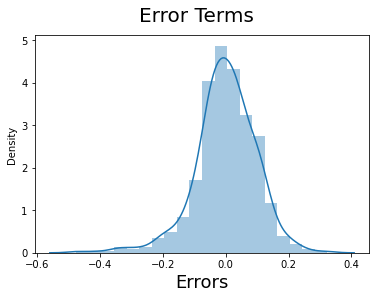

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [62]:
num_vars = ['season', 'mnth', 'weekday', 'weathersit', 'temp','atemp','hum','windspeed','regi_casual','cnt','day']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,regi_casual
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.485540,0.479452,0.497717,0.036530,0.503044,0.698630,0.187215,0.558941,0.532991,0.638508,0.313350,0.520592,0.500609,0.089946
std,0.369821,0.500722,0.311080,0.188034,0.331402,0.459904,0.269422,0.233698,0.217888,0.148974,0.159947,0.218435,0.285836,0.096974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000163
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.250000,0.037805
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.466667,0.062506
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.759096,0.714132,0.743928,0.403048,0.672745,0.766667,0.105458
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,0.636289


#### Dividing into X_test and y_test

In [64]:
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [66]:
# Creating X_test_m5 dataframe by dropping variables from X_test_m5

X_test_m5 = X_test_m5.drop(["day","mnth","temp","hum"], axis = 1)

In [67]:
# Making predictions using the fourth model

y_pred_m5 = lr_5.predict(X_test_m5)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

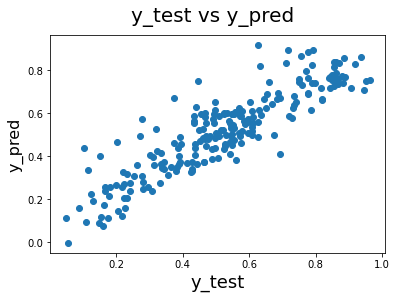

In [68]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m5)

0.7838243796819965